In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

# Load your CSV data
data = pd.read_csv("/content/Ninapro DB1 12 Gestures.csv")

# Check if 'stimulus' column exists in your dataset
if 'stimulus' not in data.columns:
    print("The 'stimulus' column does not exist in your dataset. Please check your CSV file.")
else:
    # Define the gestures you want to train on (e.g., gestures 0, 1, 2, and 3)
    gestures_to_train = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

    # Filter the data to only include the desired gestures
    data = data[data['stimulus'].isin(gestures_to_train)]

    # Reassign the labels
    le = LabelEncoder()
    data['stimulus'] = le.fit_transform(data['stimulus'])

    # Assuming 'stimulus' column contains the labels
    X = data.drop(columns=['stimulus']).values  # Features
    y = data['stimulus'].values                # Labels

    # Data preprocessing
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the data into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Build a deep learning model with high complexity
    model = Sequential()
    model.add(Dense(units=2048, activation='relu', input_dim=11))  # Increase units
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Add multiple hidden layers with high units
    for _ in range(5):
        model.add(Dense(units=2048, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

    model.add(Dense(units=len(np.unique(y)), activation='softmax'))  # Output layer

    # Define learning rate scheduler
    def lr_schedule(epoch):
        if epoch < 20:
            return 0.001  # High learning rate initially
        else:
            return 0.0001  # Lower learning rate later

    # Implement learning rate reduction on plateau
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                  patience=5,
                                  min_lr=1e-7)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define callbacks (early stopping, learning rate schedule, and reduce LR on plateau)
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=15,
                                   restore_best_weights=True)
    lr_scheduler = LearningRateScheduler(lr_schedule)

    # Train the model for 300 epochs (increase epochs)
    history = model.fit(X_train, y_train, epochs=300, batch_size=256, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_scheduler, reduce_lr])

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)

    print("Test accuracy:", test_acc)

    # Save the trained model if needed
    model.save('exercise_1_gestures_training.h5')  # Save as a new model


<ipython-input-5-4d5d2838d107>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stimulus'] = le.fit_transform(data['stimulus'])


Epoch 1/300
1612/1612 [==============================] - 32s 16ms/step - loss: 1.5854 - accuracy: 0.4553 - val_loss: 1.1335 - val_accuracy: 0.5984 - lr: 0.0010
Epoch 2/300
1612/1612 [==============================] - 26s 16ms/step - loss: 1.2312 - accuracy: 0.5702 - val_loss: 1.0031 - val_accuracy: 0.6464 - lr: 0.0010
Epoch 3/300
1612/1612 [==============================] - 27s 16ms/step - loss: 1.1393 - accuracy: 0.6041 - val_loss: 0.9332 - val_accuracy: 0.6709 - lr: 0.0010
Epoch 4/300
1612/1612 [==============================] - 27s 17ms/step - loss: 1.0755 - accuracy: 0.6268 - val_loss: 1.0053 - val_accuracy: 0.6678 - lr: 0.0010
Epoch 5/300
1612/1612 [==============================] - 26s 16ms/step - loss: 1.0457 - accuracy: 0.6379 - val_loss: 0.8527 - val_accuracy: 0.6973 - lr: 0.0010
Epoch 6/300
1612/1612 [==============================] - 26s 16ms/step - loss: 1.0000 - accuracy: 0.6523 - val_loss: 0.8323 - val_accuracy: 0.7078 - lr: 0.0010
Epoch 7/300
1612/1612 [=================

In [6]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2048)              24576     
                                                                 
 batch_normalization_18 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 2048)              0         
                                                                 
 dense_22 (Dense)            (None, 2048)              4196352   
                                                                 
 batch_normalization_19 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 2048)             

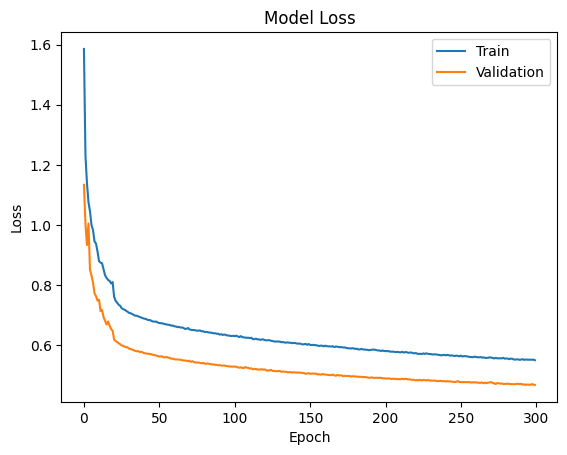

In [7]:
import matplotlib.pyplot as plt
#Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

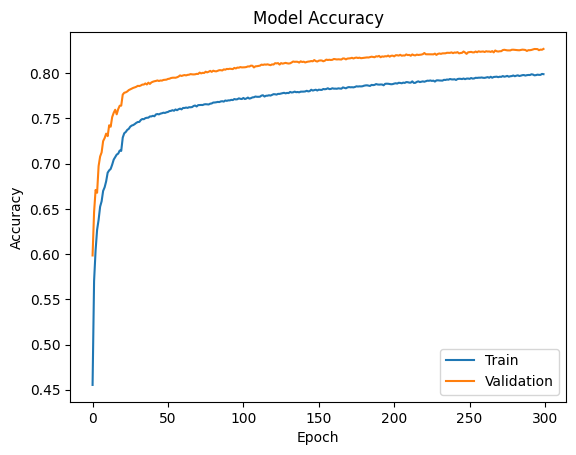

In [8]:
#Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()